# 实验2 几何变换与变形

## 2-1：图像缩放

实验要求：
1. 实现一个图像缩放函数，可以对输入图像进行任意倍数的缩放；
2. 采用双线性插值进行重采样；
3. X,Y方向的缩放倍数参函数参数的形式传入；
4. 可以只考虑输入图像为3通道，8位深度的情况；
5. 不能调用图像处理库的缩放函数来完成；

参考函数：`void Scale(const MyImage &input, MyImage &output, double sx, double sy);`

首先导入实验所需的库

In [1]:
import numpy as np
import cv2

实现`scale`函数

In [2]:
def scale(image, sx, sy):
    height, width, _ = image.shape
    # 计算新图像的高度和宽度
    new_height = int(height * sy)
    new_width = int(width * sx)

    # 创建新图像
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    inv_sx = 1 / sx
    inv_sy = 1 / sy

    for y in range(new_height):
        for x in range(new_width):
            # 计算原图像的坐标
            src_x = x * inv_sx
            src_y = y * inv_sy

            x1 = int(src_x)
            y1 = int(src_y)
            x2 = min(x1 + 1, width - 1)
            y2 = min(y1 + 1, height - 1)

            # 双线性插值
            dx = src_x - x1
            dy = src_y - y1

            new_image[y, x] = (
                (1 - dx) * (1 - dy) * image[y1, x1] +
                dx * (1 - dy) * image[y1, x2] +
                (1 - dx) * dy * image[y2, x1] +
                dx * dy * image[y2, x2]
            )
    return new_image

现在，读入图像

In [3]:
image = cv2.imread("imgs/Lab2/lab2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

准备显示图像的函数，以及滑动条相关的库

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def scale_and_display(scale_x, scale_y):
    # 使用 scale_x 和 scale_y 对图像进行缩放
    scaled_image = scale(image, scale_y, scale_x)

    # 显示缩放后的图像
    height, width = scaled_image.shape[:2]
    plt.figure(figsize=(width / 100, height / 100))
    plt.imshow(scaled_image)
    plt.axis("off")
    plt.show()

使用自己编写的`scale`函数对图像进行缩放。

注意这个缩放函数的效率很低，因此在缩放以后需要等待一段时间才能看到结果。

In [5]:
interact(
    scale_and_display,
    scale_x=FloatSlider(value=1.5, min=0.1, max=3.0, step=0.1, description="Scale X"),
    scale_y=FloatSlider(value=0.5, min=0.1, max=3.0, step=0.1, description="Scale Y"),
)

interactive(children=(FloatSlider(value=1.5, description='Scale X', max=3.0, min=0.1), FloatSlider(value=0.5, …

<function __main__.scale_and_display(scale_x, scale_y)>

## 2-2：图像变形

实验要求：

记 $[x', y'] = f([x, y])$ 为像素坐标的一个映射，实现 $f$ 所表示的图像形变。

$f$ 的逆映射为：

$$
[x, y] = f^{-1}([x', y']) =
\begin{cases}
    [x', y']
    & \text{if } r \geq 1 \\
    [\cos(\theta)x' - \sin(\theta)y', \sin(\theta)x' + \cos(\theta)y']
    & \text{otherwise}
\end{cases}
$$

其中：

$$
r = \sqrt{x'^2 + y'^2}
$$

$$
\theta = (1-r)^2
$$

$[x, y]$、$[x', y']$ 都是中心归一化坐标，请先进行转换；

中心归一化坐标：

$$
x' = \frac{x - 0.5W}{0.5W}
$$

$$
y' = \frac{y - 0.5H}{0.5H}
$$


先实现中心归一化的转换函数，包括正向和逆向

In [6]:
def normalize(size, coordinates):
    w, h = size
    x, y = coordinates
    return (2 * x - w) / w, (2 * y - h) / h


def denormalize(size, coordinates):
    w, h = size
    x, y = coordinates
    return (x * w + w) / 2, (y * h + h) / 2

接着读取图像

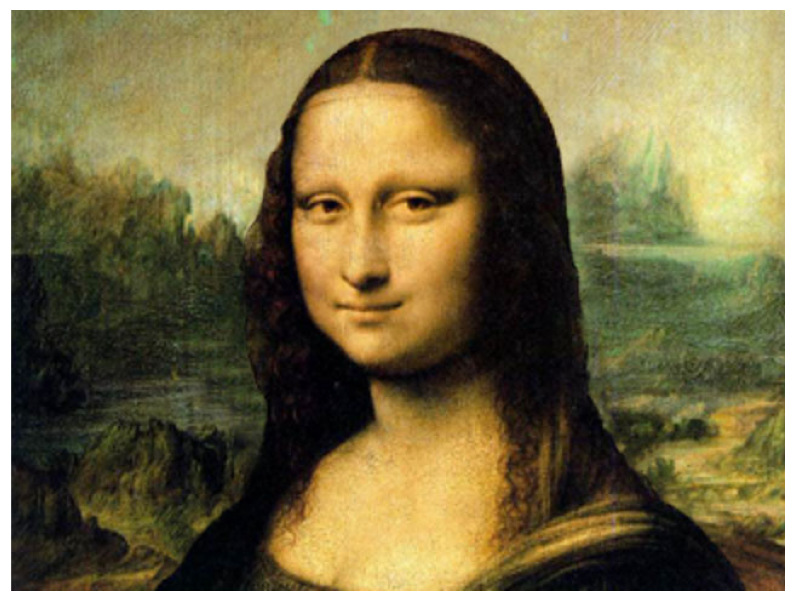

In [7]:
image = cv2.imread("imgs/Lab2/lab2.png")

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

准备变换后的新图像

In [8]:
height, width = image.shape[:2]
new_image = np.zeros((height, width, 3), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        x_, y_ = normalize((width, height), (x, y))
        r = np.sqrt(x_**2 + y_**2)
        theta = (1 - r) ** 2
        if r >= 1:
            new_x, new_y = x_, y_
        else:
            new_x = np.sin(theta) * y_ + np.cos(theta) * x_
            new_y = np.cos(theta) * y_ - np.sin(theta) * x_
        new_x, new_y = denormalize((width, height), (new_x, new_y))
        new_image[y, x] = image[int(new_y), int(new_x)]

显示变换后的图像

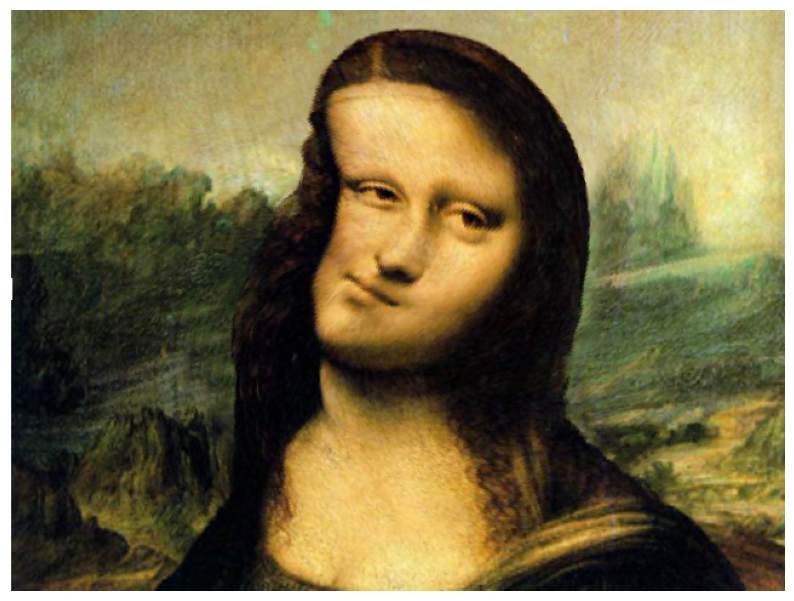

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()